In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [2]:
battle = pd.read_csv('battles.csv')

In [3]:
battle.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [4]:
battle.shape

(38, 25)

In [5]:
battle.dtypes

name                   object
year                    int64
battle_number           int64
attacker_king          object
defender_king          object
attacker_1             object
attacker_2             object
attacker_3             object
attacker_4             object
defender_1             object
defender_2             object
defender_3            float64
defender_4            float64
attacker_outcome       object
battle_type            object
major_death           float64
major_capture         float64
attacker_size         float64
defender_size         float64
attacker_commander     object
defender_commander     object
summer                float64
location               object
region                 object
note                   object
dtype: object

In [6]:
battle.columns

Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note'],
      dtype='object')

In [7]:
battle.rename(columns = {'attacker_1':'primary_attacker'}, inplace = True)
battle.head()

,name,year,battle_number,attacker_king,defender_king,primary_attacker,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [8]:
battle['attacker_king'].value_counts()

Joffrey/Tommen Baratheon    14
Robb Stark                  10
Balon/Euron Greyjoy          7
Stannis Baratheon            5
Name: attacker_king, dtype: int64

In [9]:
battle.rename(columns = {'defender_1':'primary_defender'}, inplace = True)
battle.head()

,name,year,battle_number,attacker_king,defender_king,primary_attacker,attacker_2,attacker_3,attacker_4,primary_defender,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [10]:
battle['location'].value_counts()

Riverrun                                3
Winterfell                              3
Darry                                   2
Storm's End                             2
Harrenhal                               2
Deepwood Motte                          2
Torrhen's Square                        2
Moat Cailin                             2
Dragonstone                             1
Mummer's Ford                           1
Green Fork                              1
Castle Black                            1
Whispering Wood                         1
Duskendale                              1
King's Landing                          1
Crag                                    1
Ryamsport, Vinetown, Starfish Harbor    1
Seagard                                 1
Raventree                               1
Shield Islands                          1
Ruby Ford                               1
Stony Shore                             1
Saltpans                                1
Oxcross                           

In [31]:
attacker_size = battle[['attacker_king', 'attacker_size']]
attacker_size.head()

,attacker_king,attacker_size
0,Joffrey/Tommen Baratheon,15000.0
1,Joffrey/Tommen Baratheon,NaN
2,Joffrey/Tommen Baratheon,15000.0
3,Robb Stark,18000.0
4,Robb Stark,1875.0


In [36]:
attacker_size = attacker_size.sort_values('attacker_size', ascending = False)
attacker_size.head()

,attacker_king,attacker_size
27,Stannis Baratheon,100000.0
19,Stannis Baratheon,21000.0
16,Joffrey/Tommen Baratheon,20000.0
3,Robb Stark,18000.0
2,Joffrey/Tommen Baratheon,15000.0


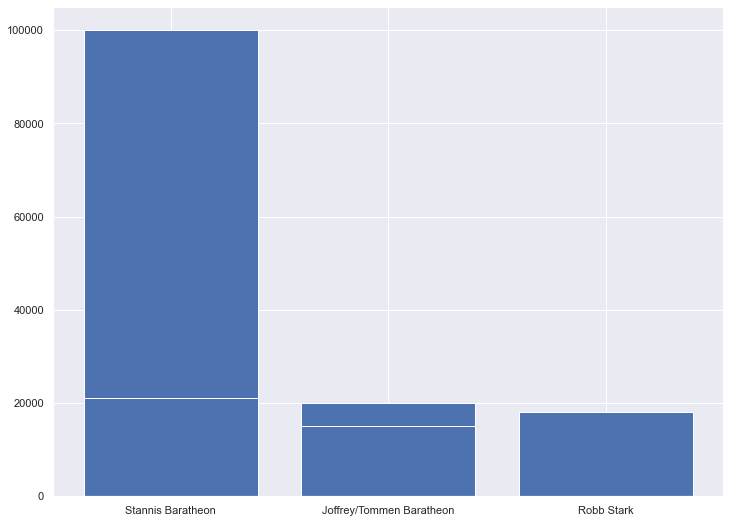

In [37]:
# zthis method is best only when the variables for visualization are much say like 1 to 20
plt.figure(figsize = (12,9))
plt.bar(list(attacker_size['attacker_king'])[0:6], list(attacker_size['attacker_size'])[0:6])
plt.show()

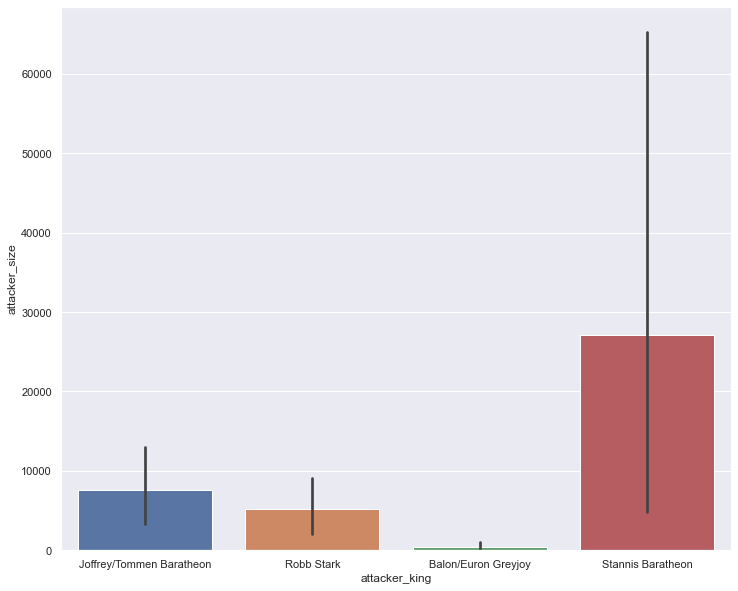

In [35]:
# This method is best when the visualization is fixed say from 1 to 5.
sns.set(rc = {'figure.figsize': (12,10)})
sns.barplot(x = 'attacker_king', y = 'attacker_size', data = battle)
plt.show()

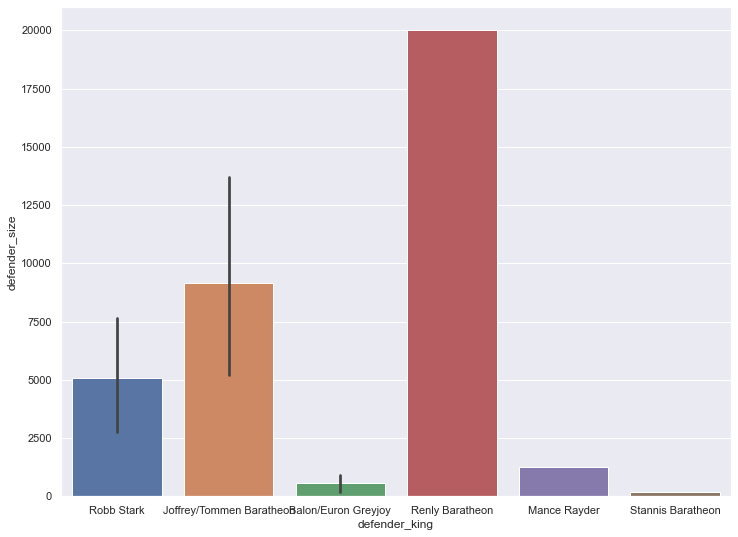

In [40]:
sns.set(rc = {'figure.figsize' : (12,9)})
sns.barplot(x = 'defender_king', y = 'defender_size', data = battle)
plt.show()

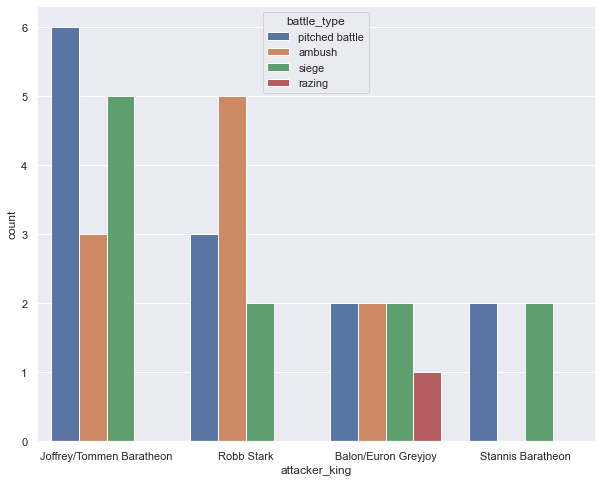

In [83]:
sns.countplot(x = battle['attacker_king'], hue = battle['battle_type'])
plt.show()

In [81]:
death = pd.read_csv('character-deaths.csv')
death.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [53]:
death.shape

(917, 13)

In [54]:
death['Gender'].value_counts()

1    760
0    157
Name: Gender, dtype: int64

In [55]:
death['Nobility'].value_counts()

0    487
1    430
Name: Nobility, dtype: int64

C:\Users\gregi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


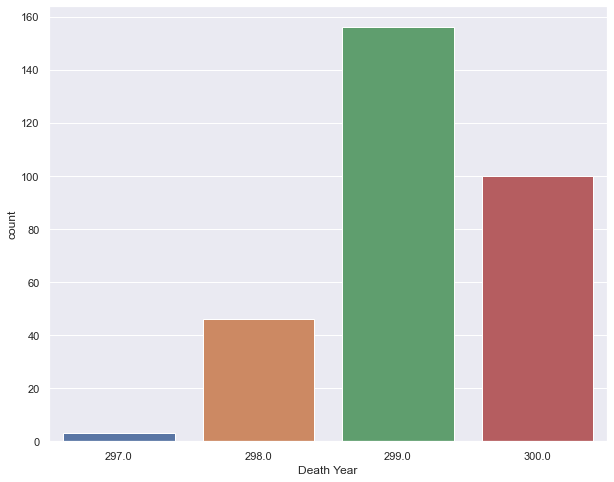

In [76]:
sns.set(rc = {'figure.figsize': (10,8)})
sns.countplot(death['Death Year'])
plt.show()

C:\Users\gregi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


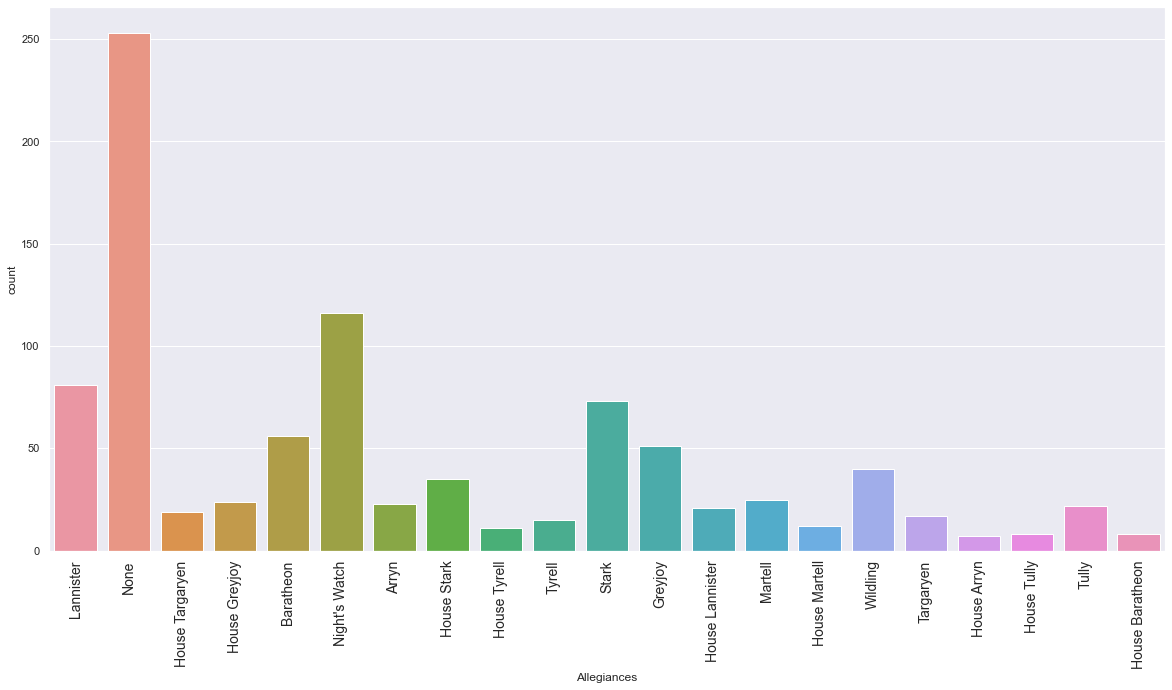

In [70]:
sns.set(rc = {'figure.figsize': (20,10)})
s = sns.countplot(death['Allegiances'])
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 14)
plt.show()